# Import Modules

We will need some basic packages, but will also need to import different AutoRA theorists. Here, we will import our three theorists: Bayesian Machine Scientist, Bayesian Symbolic Regression, and Differentiable Architecture Search. 

In [ ]:

# Uncomment the following lines when running on Google Colab
# !pip install "autora[theorist-bms]"
# !pip install "autora[theorist-bsr]"
# !pip install "autora[theorist-darts]"
# !pip install "autora[experimentalist-model-disagreement]"

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from autora.theorist.bms import BMSRegressor; BMSRegressor()
from autora.theorist.bsr import BSRRegressor; BSRRegressor()
from autora.theorist.darts import DARTSRegressor; DARTSRegressor()
from autora.experimentalist.model_disagreement import model_disagreement_sample

# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [24]:
#Define meta-parameters
X = np.linspace(start=-3, stop=6, num=10).reshape(-1, 1)

#Define ground truth model
def ground_truth(xs):
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot The Data

Let's plot the data to see what we are working with.

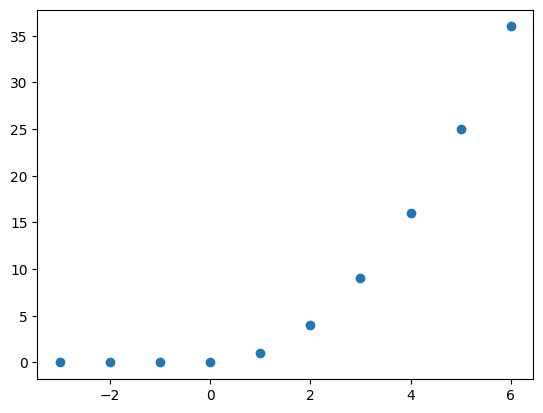

In [25]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define And Fit Theorists

Next, we initialize each theorist and then train them on the data. 

Note that this can take quite some time, especially for the BSR Theorist.

In [5]:
%%capture

#Initiate theorists
bms_theorist = BMSRegressor()
bsr_theorist = BSRRegressor()
darts_theorist = DARTSRegressor()

#Fit theorists
bms_theorist.fit(X,ground_truth(X))
bsr_theorist.fit(X,ground_truth(X))
darts_theorist.fit(X,ground_truth(X))

INFO:autora.theorist.bms.regressor:BMS fitting started
INFO:autora.theorist.bms.regressor:BMS fitting finished
INFO:autora.theorist.darts.regressor:Starting fit initialization
INFO:autora.theorist.darts.regressor:Starting fit.


# Plot Theorists On Data

We can then plot each theorist to see how well it recovered the data.

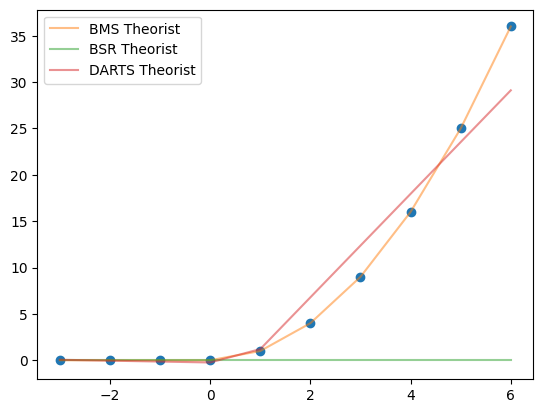

In [26]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, bms_theorist.predict(X), alpha = .5, label = 'BMS Theorist')
plt.plot(X, bsr_theorist.predict(X), alpha = .5, label = 'BSR Theorist')
plt.plot(X, darts_theorist.predict(X), alpha = .5, label = 'DARTS Theorist')
plt.legend()
plt.show()

# Plot Model Disagreements

We can also plot the disagreement between each pair of theorists. The grey dashed lines represent the degree of disagreement for each datapoint. Computationally the Model Disagreement Experimentalist takes the square of these numbers to determine where disagreement is largest.

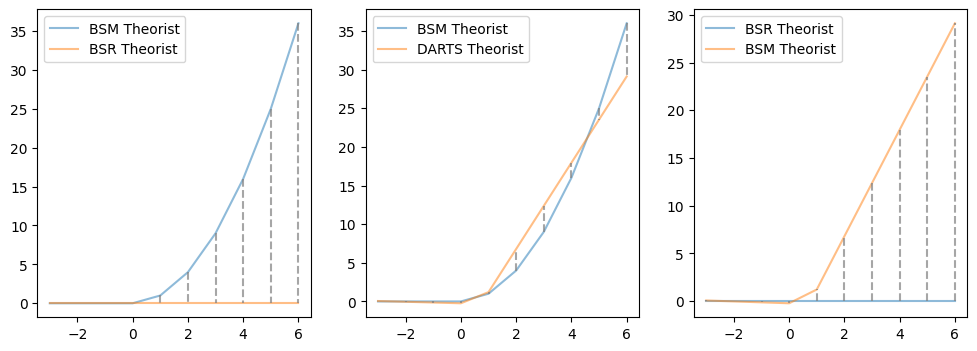

In [27]:
fig, ax = plt.subplots(1,3, figsize=[12,4])

def plot_disagreement(X, model_a, model_b, plot_index, labels):
    ax[plot_index].plot(X, model_a.predict(X), alpha = .5, label = labels[0]) #Plot model a
    ax[plot_index].plot(X, model_b.predict(X), alpha = .5, label = labels[1]) #Plot model b
    for xi, _ in enumerate(X):
        ax[plot_index].plot([X[xi],X[xi]], [model_a.predict(X)[xi], model_b.predict(X)[xi]], alpha = .7, c = 'grey', linestyle = '--') #Plot disagreement
    ax[plot_index].legend()
        
plot_disagreement(X, bms_theorist, bsr_theorist, 0, ['BSM Theorist', 'BSR Theorist'])
plot_disagreement(X, bms_theorist, darts_theorist, 1, ['BSM Theorist', 'DARTS Theorist'])
plot_disagreement(X, bsr_theorist, darts_theorist, 2, ['BSR Theorist', 'BSM Theorist'])
plt.show()

# Run And Report Model Disagreement Samples

Now we will get a proposal from the experimentalist as to which datapoints to investigate next. We will retrieve 5 new datapoints in this example.

In [29]:
sampler_proposal = model_disagreement_sample(X, [bms_theorist, bsr_theorist, darts_theorist], 5)

print('New datapoints:\n' + str(sampler_proposal))

New datapoints:
[[6.]
 [5.]
 [4.]
 [3.]
 [2.]]


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

In [30]:
labels = ['Proposed Datapoints',[None]*(len(sampler_proposal)-1)]
labels

['Proposed Datapoints', [None, None, None, None]]

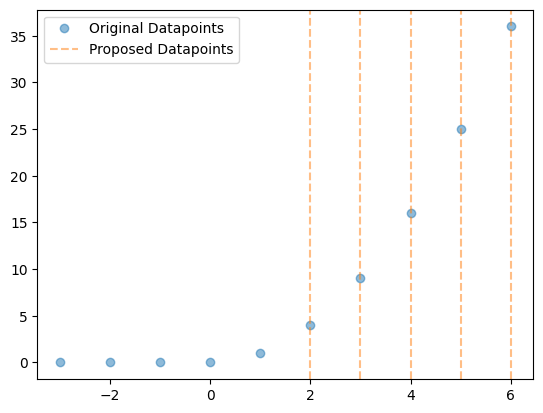

In [31]:
#Set proposal labels
labels = [None]*len(sampler_proposal)
labels[0] = 'Proposed Datapoints'

#Plot data and proposals
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
[plt.axvline(condition, color = '#ff7f0e', linestyle = '--', alpha = .5, label = labels[index]) for index,condition in enumerate(sampler_proposal)]
plt.legend()
plt.show()